In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from pandas import Series
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
train = pd.read_csv("Train_SU63ISt.csv")
test = pd.read_csv("Test_0qrQsBZ.csv")
train

ID          Datetime  Count
0          0  25-08-2012 00:00      8
1          1  25-08-2012 01:00      2
2          2  25-08-2012 02:00      6
3          3  25-08-2012 03:00      2
4          4  25-08-2012 04:00      2
...      ...               ...    ...
18283  18283  25-09-2014 19:00    868
18284  18284  25-09-2014 20:00    732
18285  18285  25-09-2014 21:00    702
18286  18286  25-09-2014 22:00    580
18287  18287  25-09-2014 23:00    534

[18288 rows x 3 columns]

***Make copy of Original***

In [3]:
train_original = train.copy()
test_original = test.copy()

In [4]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [5]:
train.dtypes,test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [6]:
train.shape, test.shape

((18288, 3), (5112, 2))

***Extract Features from Time***

In [7]:
train['Datetime'] = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format = '%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime, format = '%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime, format = '%d-%m-%Y %H:%M')
train.dtypes

ID                   int64
Datetime    datetime64[ns]
Count                int64
dtype: object

In [8]:
for i in (train, test, train_original, test_original):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day']= i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour
i

ID            Datetime  year  month  day  Hour
0     18288 2014-09-26 00:00:00  2014      9   26     0
1     18289 2014-09-26 01:00:00  2014      9   26     1
2     18290 2014-09-26 02:00:00  2014      9   26     2
3     18291 2014-09-26 03:00:00  2014      9   26     3
4     18292 2014-09-26 04:00:00  2014      9   26     4
...     ...                 ...   ...    ...  ...   ...
5107  23395 2015-04-26 19:00:00  2015      4   26    19
5108  23396 2015-04-26 20:00:00  2015      4   26    20
5109  23397 2015-04-26 21:00:00  2015      4   26    21
5110  23398 2015-04-26 22:00:00  2015      4   26    22
5111  23399 2015-04-26 23:00:00  2015      4   26    23

[5112 rows x 6 columns]

In [9]:
train['Day of week'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']
train

ID            Datetime  Count  year  month  day  Hour  Day of week
0          0 2012-08-25 00:00:00      8  2012      8   25     0            5
1          1 2012-08-25 01:00:00      2  2012      8   25     1            5
2          2 2012-08-25 02:00:00      6  2012      8   25     2            5
3          3 2012-08-25 03:00:00      2  2012      8   25     3            5
4          4 2012-08-25 04:00:00      2  2012      8   25     4            5
...      ...                 ...    ...   ...    ...  ...   ...          ...
18283  18283 2014-09-25 19:00:00    868  2014      9   25    19            3
18284  18284 2014-09-25 20:00:00    732  2014      9   25    20            3
18285  18285 2014-09-25 21:00:00    702  2014      9   25    21            3
18286  18286 2014-09-25 22:00:00    580  2014      9   25    22            3
18287  18287 2014-09-25 23:00:00    534  2014      9   25    23            3

[18288 rows x 8 columns]

In [10]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
    
temp2 = train['Datetime'].apply(applyer)
train['weekend'] = temp2


No handles with labels found to put in legend.


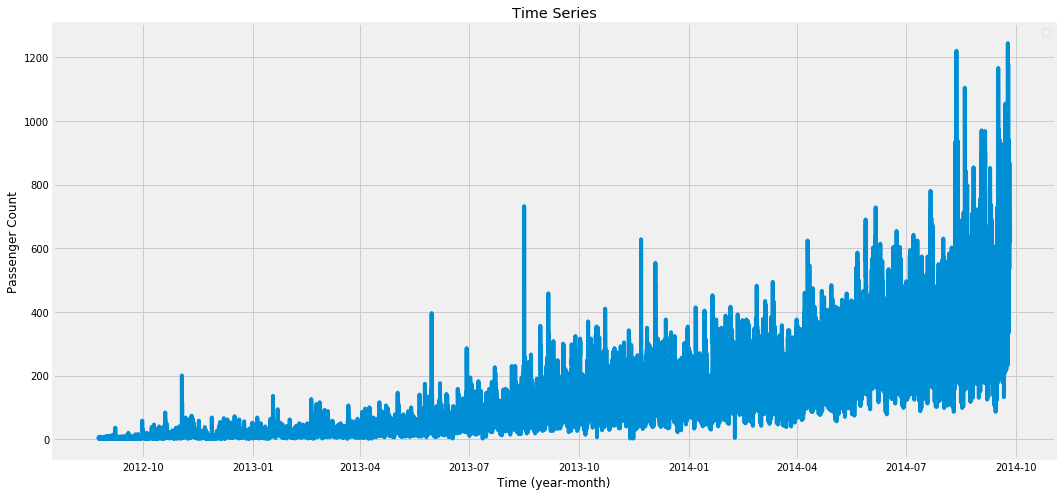

In [11]:
train.index = train['Datetime']
df = train.drop('ID',1)
ts = df['Count']
plt.figure(figsize = (16,8))
plt.plot(ts)
plt.title("Time Series")
plt.xlabel("Time (year-month)")
plt.ylabel("Passenger Count")
plt.legend(loc = 'best')

*** Exploratory Analysis***

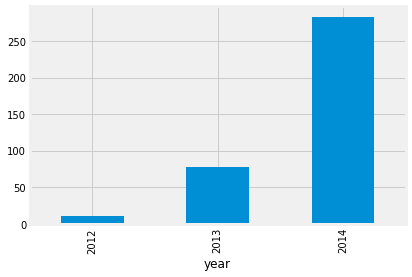

In [12]:
train.groupby('year')['Count'].mean().plot.bar()

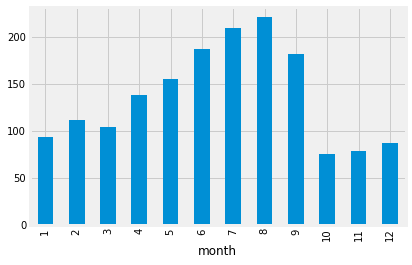

In [13]:
train.groupby('month')['Count'].mean().plot.bar()

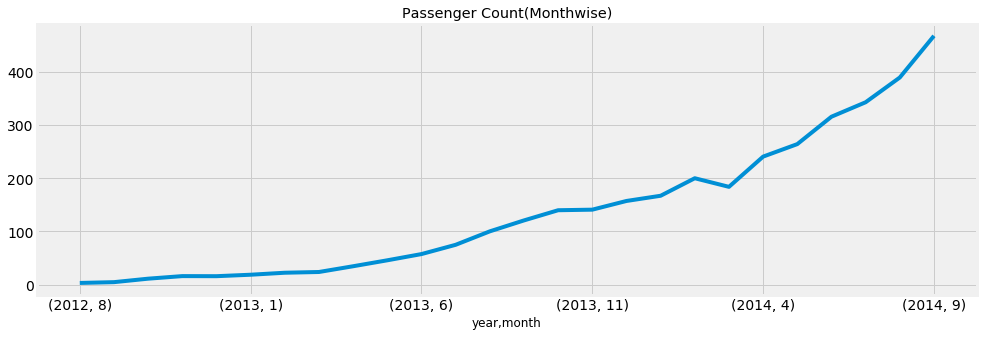

In [14]:
temp = train.groupby(['year', 'month'])['Count'].mean()
temp.plot(figsize =(15,5), title = "Passenger Count(Monthwise)", fontsize = 14)


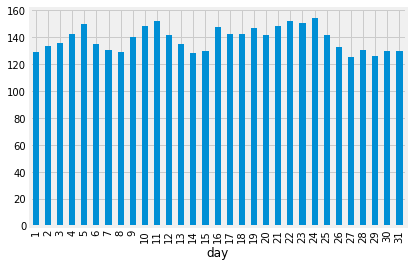

In [15]:
train.groupby('day') ['Count'].mean().plot.bar()

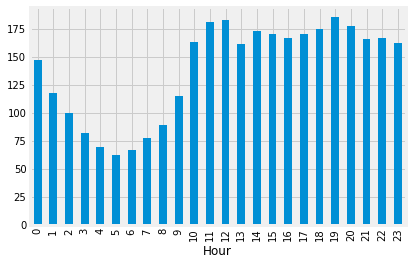

In [16]:
train.groupby('Hour')['Count'].mean().plot.bar()

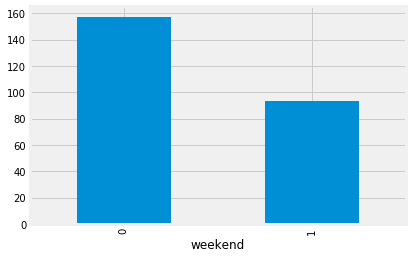

In [17]:
train.groupby('weekend') ['Count'].mean().plot.bar()

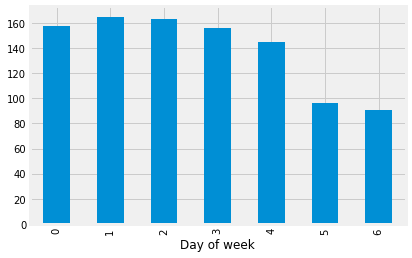

In [18]:
train.groupby('Day of week') ['Count'].mean().plot.bar()

In [19]:
train.Timestamp = pd.to_datetime(train.Datetime, format = '%d-%m-%y %H:%M')
train.index = train.Timestamp

#Hourly
hourly = train.resample('H').mean()

#Daily
daily = train.resample('D').mean()

#Weekly
weekly = train.resample('W').mean()

#Monthly
monthly = train.resample('M').mean()

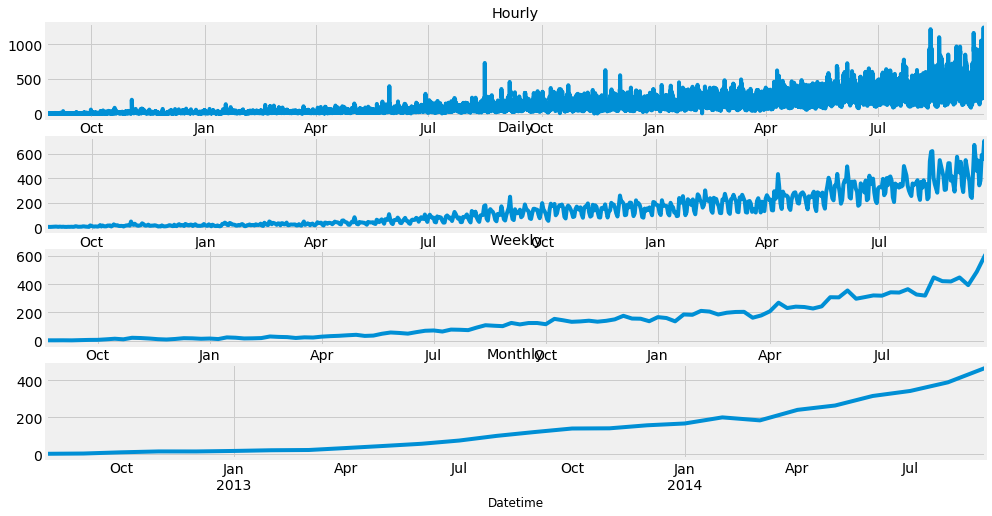

In [20]:
fig,axs = plt.subplots(4,1)

hourly.Count.plot(figsize = (15,8), title = "Hourly", fontsize = 14, ax = axs[0])
daily.Count.plot(figsize = (15,8), title = "Daily", fontsize = 14, ax = axs[1])
weekly.Count.plot(figsize = (15,8), title = "Weekly", fontsize = 14, ax = axs[2])
monthly.Count.plot(figsize = (15,8), title = "Monthly", fontsize = 14, ax = axs[3])

In [21]:
test.Timestamp = pd.to_datetime(test['Datetime'], format='%d-%m-%Y %H:%M')
test.index = test.Timestamp

#Converting to Daily mean 
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train['Datetime'], format='%d-%m-%Y %H:%M')
train.index = train.Timestamp

#Converting to Daily mean
train = train.resample('D').mean()

In [30]:
train

ID       Count    year  month   day  Hour  Day of week  \
Datetime                                                                  
2012-08-25     11.5    3.166667  2012.0    8.0  25.0  11.5          5.0   
2012-08-26     35.5    3.666667  2012.0    8.0  26.0  11.5          6.0   
2012-08-27     59.5    2.583333  2012.0    8.0  27.0  11.5          0.0   
2012-08-28     83.5    2.416667  2012.0    8.0  28.0  11.5          1.0   
2012-08-29    107.5    2.500000  2012.0    8.0  29.0  11.5          2.0   
...             ...         ...     ...    ...   ...   ...          ...   
2014-09-21  18179.5  379.250000  2014.0    9.0  21.0  11.5          6.0   
2014-09-22  18203.5  588.166667  2014.0    9.0  22.0  11.5          0.0   
2014-09-23  18227.5  554.333333  2014.0    9.0  23.0  11.5          1.0   
2014-09-24  18251.5  702.333333  2014.0    9.0  24.0  11.5          2.0   
2014-09-25  18275.5  589.666667  2014.0    9.0  25.0  11.5          3.0   

            weekend  
Datetime             
2012-08-25      1.0  
2012-08-26      1.0  
2012-08-27      0.0  
2012-08-28      0.0  
2012-08-29      0.0  
...             ...  
2014-09-21      1.0  
2014-09-22      0.0  
2014-09-23      0.0  
2014-09-24      0.0  
2014-09-25      0.0  

[762 rows x 8 columns]

***Divide data into training and validation***

In [23]:
Train = train.loc['2012-08-25':'2014-06-24']
valid = train.loc['2014-06-25':'2014-09-25']

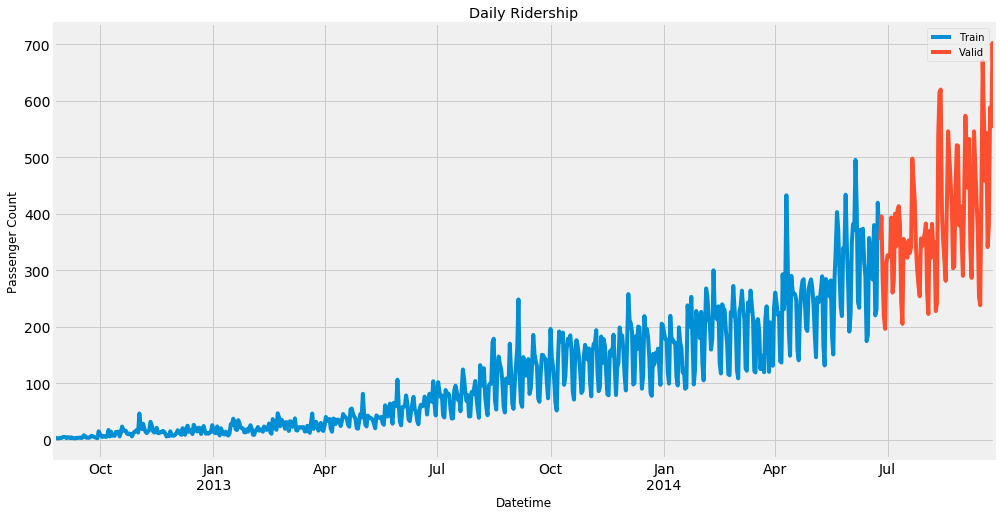

In [24]:
Train.Count.plot(figsize = (15,8), title = 'Daily Ridership', fontsize = 14, label = 'Train')
valid.Count.plot(figsize = (15,8), title = 'Daily Ridership', fontsize =14, label = 'Valid')
plt.xlabel('Datetime')
plt.ylabel('Passenger Count')
plt.legend(loc = 'best')

## Naive Approach

Text(0.5, 1.0, 'Naive Forecast')

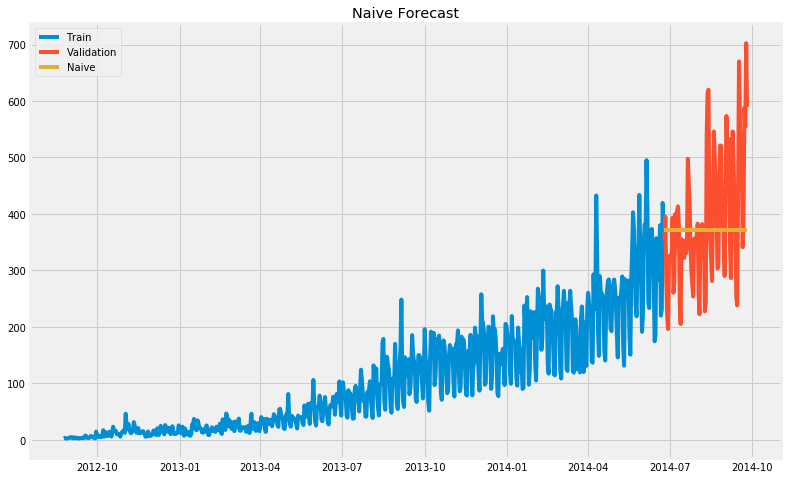

In [26]:
dd = np.asarray(Train.Count)
y_hat =valid.copy()
y_hat['naive']= Train.Count.iloc[-1]
plt.figure(figsize = (12,8))
plt.plot(Train.index, Train['Count'],label = 'Train')
plt.plot(valid.index, valid['Count'], label = 'Validation')
plt.plot(y_hat.index, y_hat['naive'],  label = 'Naive')
plt.legend(loc = 'best')
plt.title('Naive Forecast')

*** Calculate RMS Error for Naive Approach***

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(valid.Count, y_hat.naive))
rmse

111.79050467496724

## Moving Average

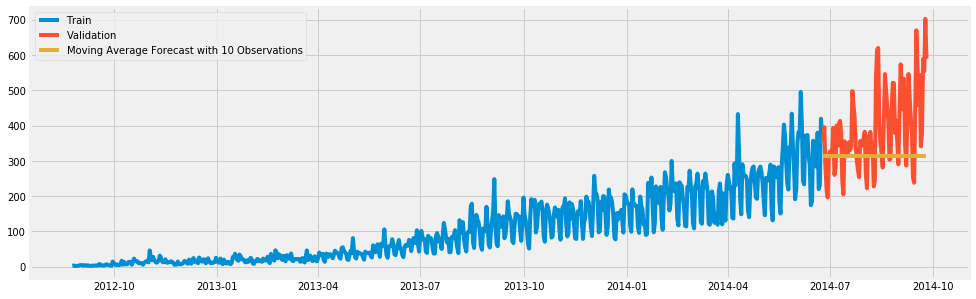

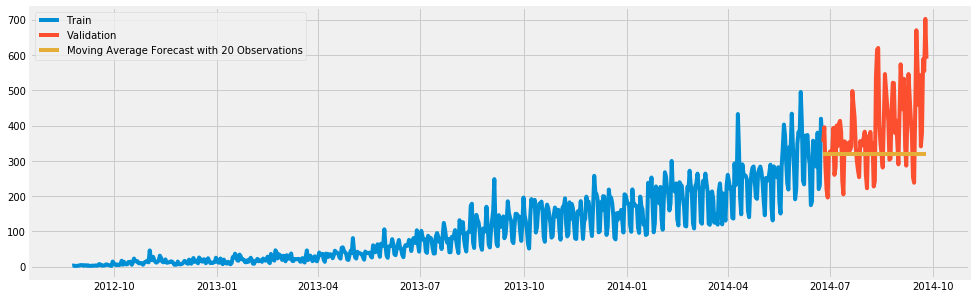

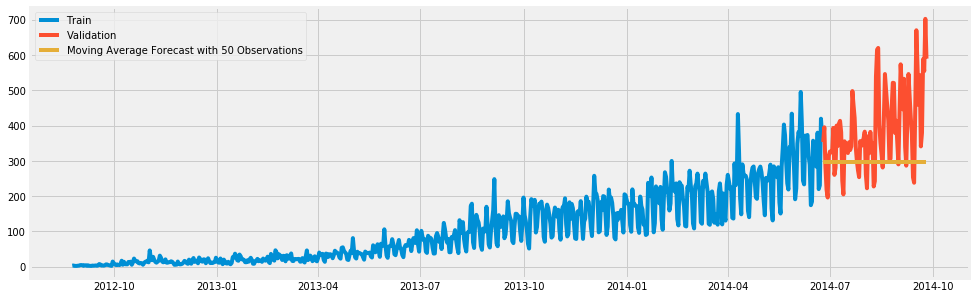

In [29]:
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast'] = Train['Count'].rolling(10).mean().iloc[-1]   # 10 Days
plt.figure(figsize = (15,5))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = 'Moving Average Forecast with 10 Observations')
plt.legend(loc = 'best')
plt.show()

y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast'] = Train['Count'].rolling(20).mean().iloc[-1]   # 20 Days
plt.figure(figsize = (15,5))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'],label = 'Moving Average Forecast with 20 Observations')
plt.legend(loc = 'best')
plt.show()

y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast']= Train['Count'].rolling(50).mean().iloc[-1]    # 50 Days
plt.figure(figsize = (15,5))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = "Moving Average Forecast with 50 Observations")
plt.legend(loc = 'best')
plt.show()

***RMS Error for Moving Average***

In [31]:
rmse = sqrt(mean_squared_error(valid['Count'], y_hat_avg['moving_average_forecast']))
rmse

144.19175679986793

***Simple Exponential Smoothing***

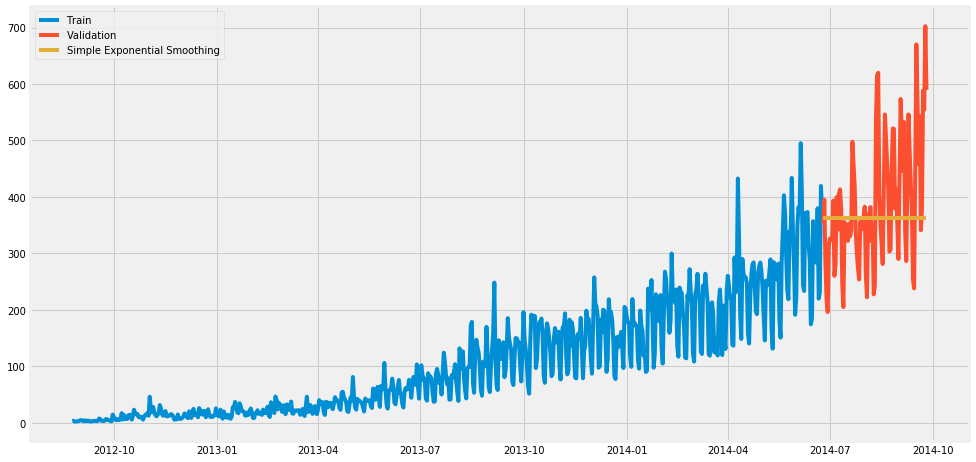

In [39]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

y_hat = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level = 0.6, optimized = False)
y_hat['SES'] = fit2.forecast(len(valid))
plt.figure(figsize =(15,8))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Validation')
plt.plot(y_hat['SES'], label = 'Simple Exponential Smoothing')
plt.legend(loc = 'best')


***RMSE Error for Simple Exponential Smoothing***

In [40]:
rmse = sqrt(mean_squared_error(valid.Count, y_hat['SES']))
rmse

113.43708111884514

## Holt's Linear Trend Model

<Figure size 1600x800 with 0 Axes>

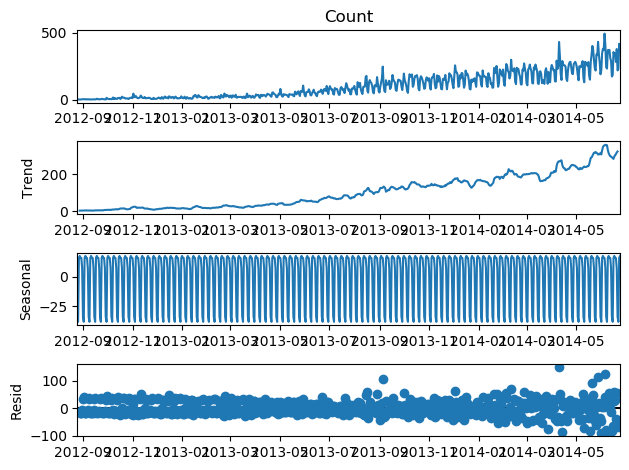

(2.986350959013858,
 1.0,
 20,
 741,
 {'1%': -3.4392057325732104,
  '5%': -2.8654483492874236,
  '10%': -2.5688512291811225},
 7212.068059584323)

In [42]:
plt.style.use('default')
plt.figure(figsize = (16,8))
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()
result

In [44]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(records):
    result=adfuller(records)
    labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for label,value in zip(labels,result):
        print(label+" : "+str(value))
    if result[1]<=0.05:
        print("Null hypothesis is rejected. Series is stationary.")
    else:
        print("Null hypothesis is accepted. Series in not stationary.")
        
adfuller_test(train.Count) 

ADF Test Statistic : 2.986350959013858
p-value : 1.0
#Lags Used : 20
Number of Observations Used : 741
Null hypothesis is accepted. Series in not stationary.


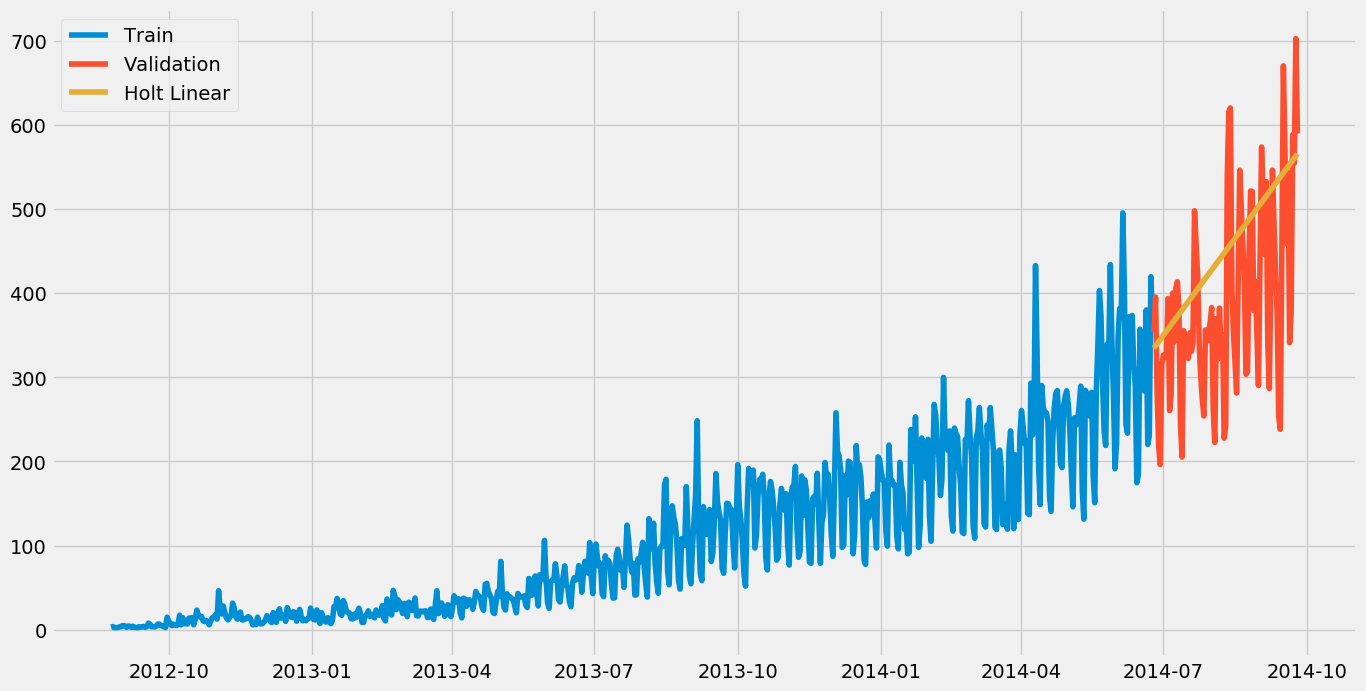

In [45]:
y_hat_holt = valid.copy()
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3, smoothing_slope = 0.1)
y_hat_holt['Holt_linear'] = fit1.forecast(len(valid))
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,8))
plt.plot(Train.Count, label = 'Train')
plt.plot(valid.Count, label = 'Validation')
plt.plot(y_hat_holt['Holt_linear'], label = 'Holt Linear')
plt.legend(loc = 'best')

In [46]:
rmse = sqrt(mean_squared_error(valid.Count, y_hat_holt.Holt_linear))
rmse

112.94278345314041

*** Make Predictions on test set***

In [47]:
predict = fit1.forecast(len(test))
test['prediction'] = predict

In [48]:
#Calculating hourly ration of count
train_original['ratio'] = train_original['Count']/train_original['Count'].sum()

#Grouping hourly ratio
temp = train_original.groupby(['Hour']) ['ratio'].sum()

#Group by to csv format
pd.DataFrame(temp, columns= ['Hour', 'ratio']).to_csv('Groupby.csv')
temp2 = pd.read_csv("Groupby.csv")
temp2 =temp2.drop('Hour.1',1)
#Merge test and test_original on day, month and year
merge = pd.merge(test, test_original, on = ('day', 'month','year'), how = 'left')
merge['Hour'] = merge['Hour_y']
merge = merge.drop(['year','month','day','Hour_x','Datetime','Hour_y'], axis =1)

#Predicting by merging temp2 and merge
prediction = pd.merge(merge, temp2, on = 'Hour',how = 'left')

#Converting the ration to original scale
prediction['Count'] = prediction['prediction'] * prediction['ratio'] * 24
prediction['ID'] = prediction['ID_y']
prediction.head()

ID_x  prediction   ID_y  Hour     ratio       Count     ID
0  18299.5  334.650767  18288     0  0.044287  355.692974  18288
1  18299.5  334.650767  18289     1  0.035343  283.861602  18289
2  18299.5  334.650767  18290     2  0.029911  240.234347  18290
3  18299.5  334.650767  18291     3  0.024714  198.497058  18291
4  18299.5  334.650767  18292     4  0.020802  167.075574  18292

In [49]:
submission = prediction.drop(['ID_x','ID_y','prediction','Hour','ratio'], axis =1)
pd.DataFrame(submission, columns = ['ID','Count']).to_csv('Holt_Linear.csv')

**Holt Winter's Model**'

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


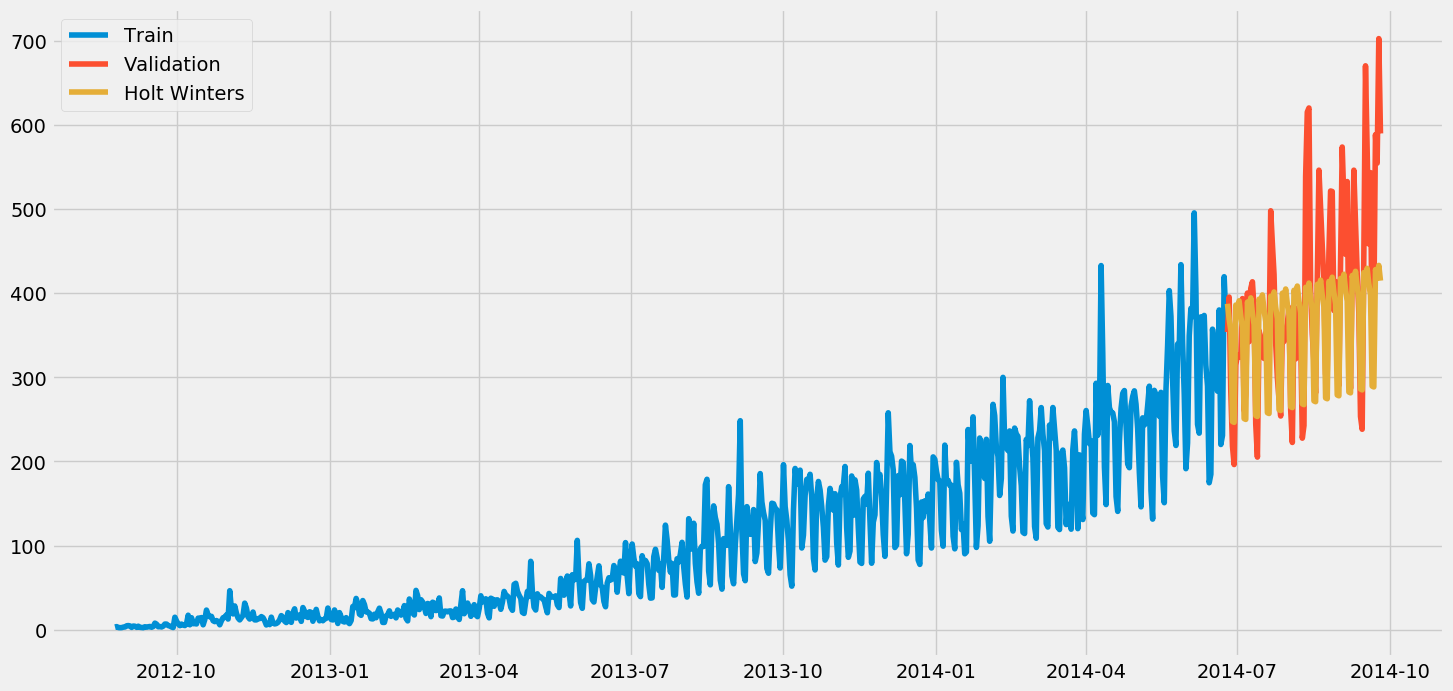

In [50]:
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['Count']), seasonal_periods= 7, trend = 'add', seasonal= 'add').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize = (16,8))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Validation')
plt.plot(y_hat_avg.Holt_Winter, label = 'Holt Winters')
plt.legend(loc = 'best')

In [51]:
rmse = sqrt(mean_squared_error(valid['Count'], y_hat_avg['Holt_Winter']))
rmse

82.32182333542627

***Apply Holt Winter's on test data***

In [52]:
predict = fit1.forecast(len(test))
test['prediction'] = predict

In [53]:
#Merge test and test_original on day,month and year
merge = pd.merge(test, test_original, on = ('day', 'month', 'year'), how = 'left')
merge['Hour']= merge['Hour_y']
merge.head()
merge = merge.drop(['year', 'month', 'Datetime','Hour_x', 'Hour_y'], axis =1)

#Predicting by merge and temp2
prediction = pd.merge(merge, temp2 , on = 'Hour', how = 'left')

#Converting the ration to original scale
prediction['Count'] = prediction['prediction'] * prediction['ratio'] *24
prediction.head()

ID_x   day  prediction   ID_y  Hour     ratio       Count
0  18299.5  26.0  387.303062  18288     0  0.044287  411.655947
1  18299.5  26.0  387.303062  18289     1  0.035343  328.522982
2  18299.5  26.0  387.303062  18290     2  0.029911  278.031630
3  18299.5  26.0  387.303062  18291     3  0.024714  229.727603
4  18299.5  26.0  387.303062  18292     4  0.020802  193.362418

In [54]:
prediction['ID']= prediction['ID_y']
submission = prediction.drop(['ID_x','ID_y','day','Hour','prediction','ratio'], axis =1)

pd.DataFrame(submission, columns = ['ID','Count']).to_csv('Holt winters.csv')

## ARIMA Model

In [61]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    #Determine rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=24).mean()
    rolstd = pd.Series(timeseries).rolling(window=24).std()
    
    #Plot rolling Statistics
    orig = plt.plot(timeseries, color = "blue", label = "Original")
    mean = plt.plot(rolmean, color = "red", label = "Rolling Mean")
    std = plt.plot(rolstd, color = "black", label = "Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean and Standard Deviation")
    plt.show(block = False)
    
    #Perform Dickey Fuller test
    print("Results of Dickey Fuller test: ")
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', '# Lag Used', 'Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

### Stationarity Check
We use Dickey Fuller test to check the stationarity of the series.
The intuition behind this test is that it determines how strongly a time series is defi ned by atrend.
The null hypothesis of the test is that time series is not stationary (has some time-dependent structure).
The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.
The test results comprise of a Test Statistic and some Critical Values for difference confi dencelevels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis andsay that the series is stationary.
We interpret this result using the Test Statistics and critical value. If the Test Statistics is smaller than critical value, it suggests we reject the null hypothesis (stationary), otherwise a greater Test Statistics suggests we accept the null hypothesis (non-stationary).

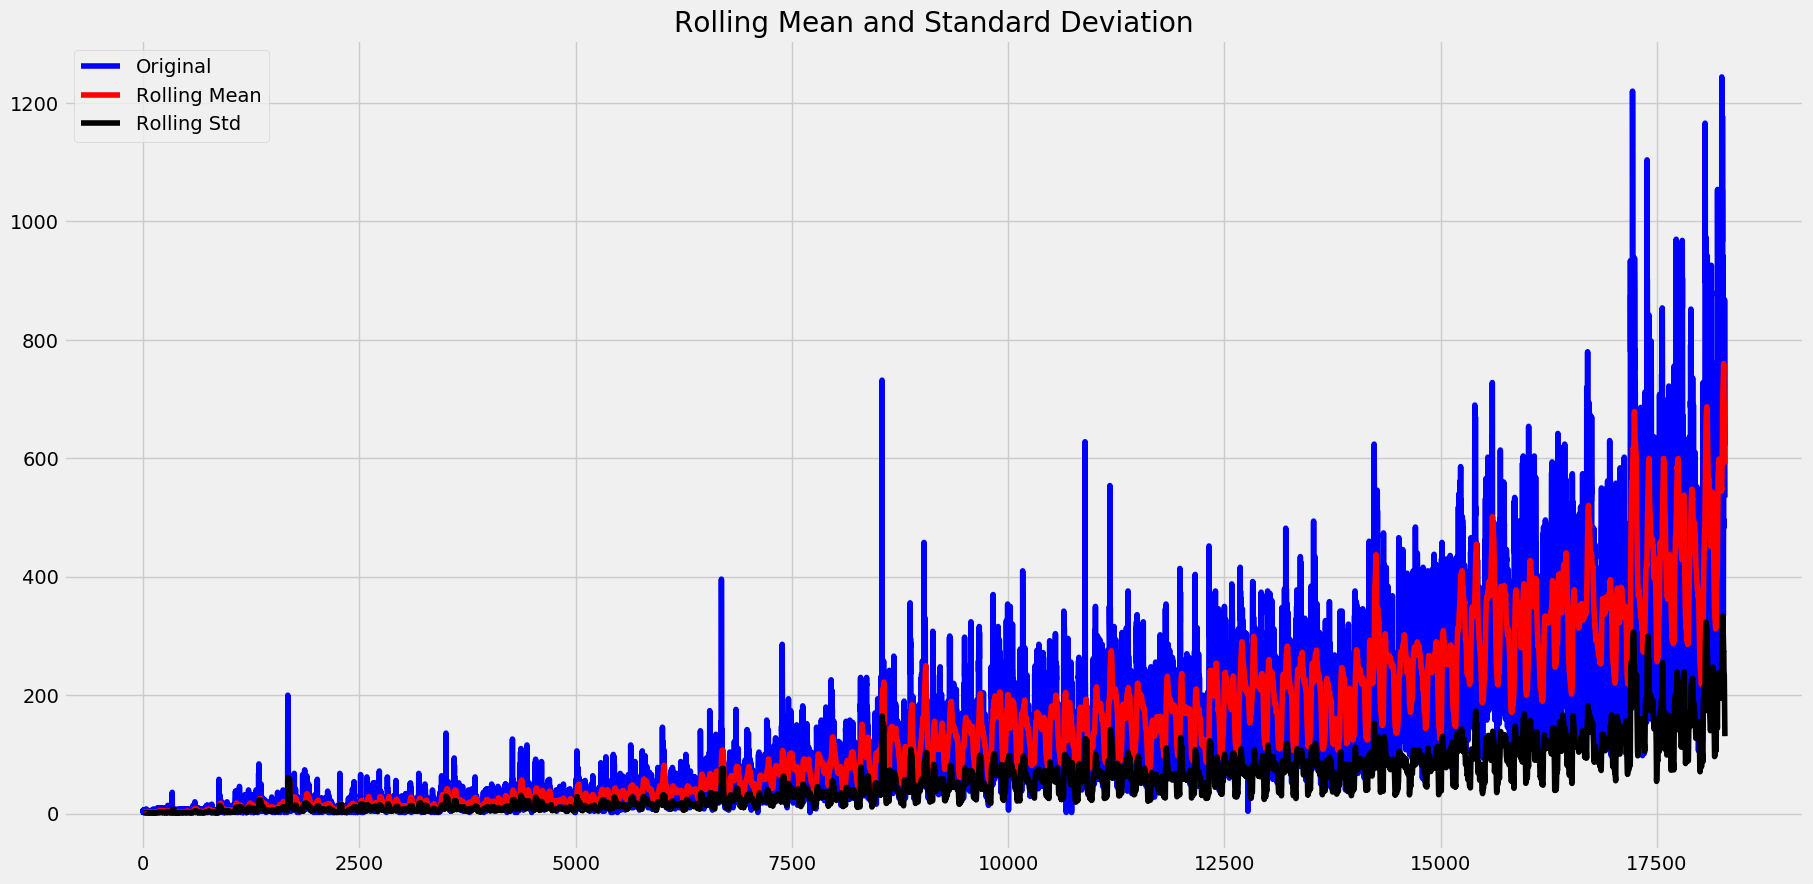

Results of Dickey Fuller test: 
Test Statistics                   -4.456561
p-value                            0.000235
# Lag Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [62]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=(20,10)
test_stationary(train_original['Count'])

The statistics shows that the time series is stationary as Test Statistic < Critical value but we can
see an increasing trend in the data. So, firstly we will try to make the data more stationary. For
doing so, we need to remove the trend and seasonality from the data.

**Remove Trend**

In [66]:
Train_log = np.log(Train['Count'])
valid_log = np.log(valid['Count'])

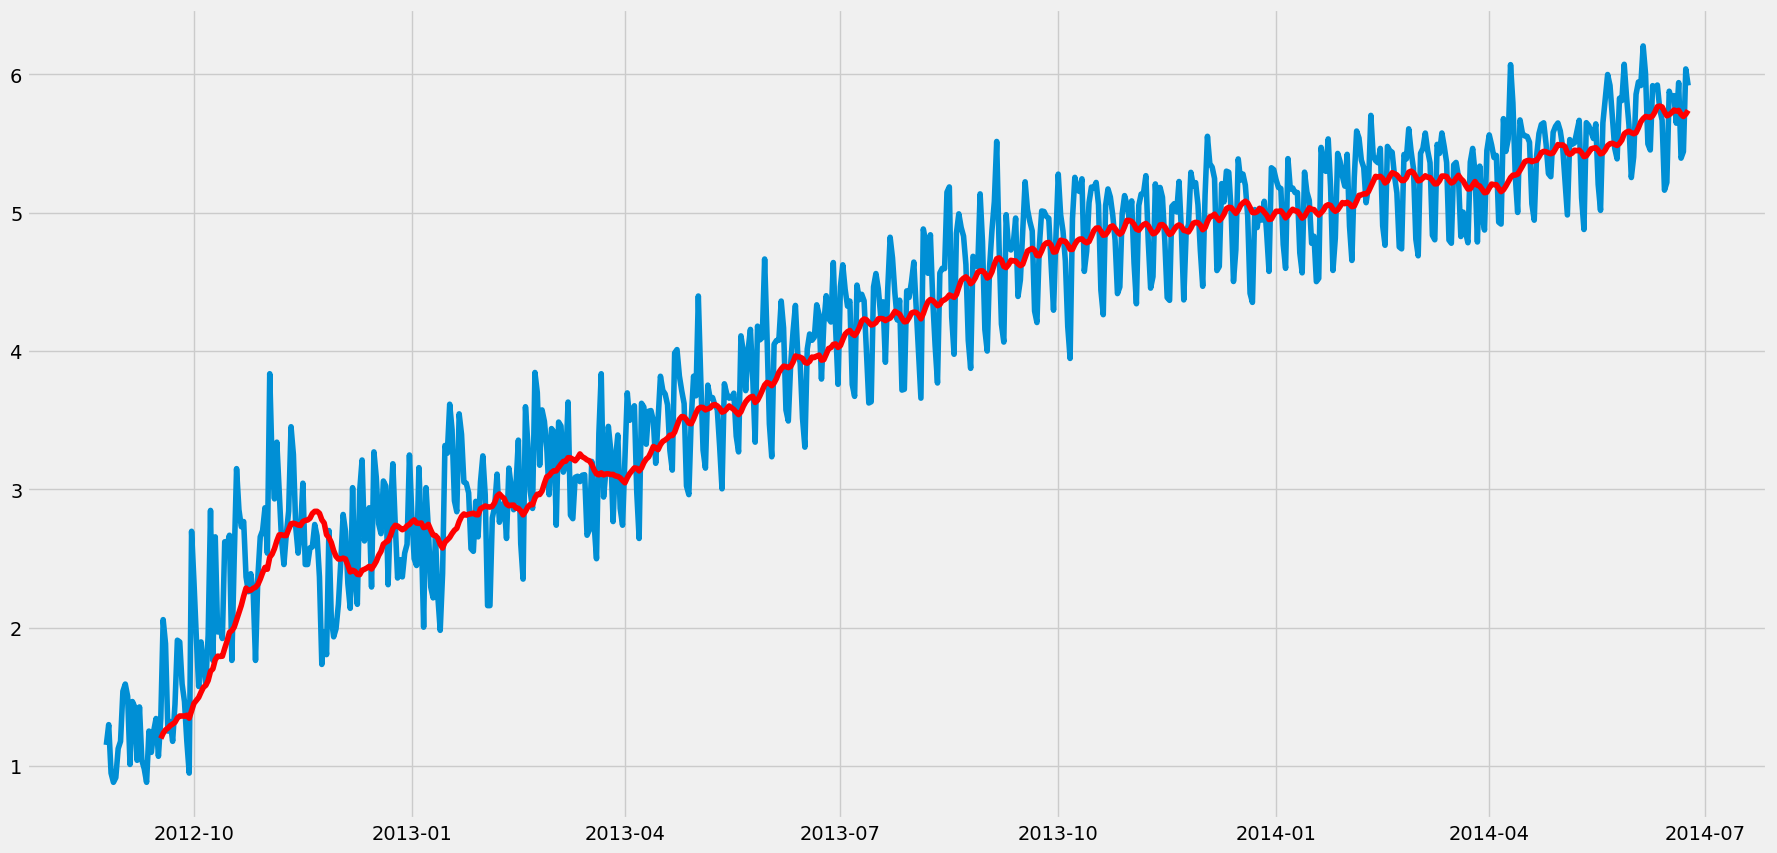

In [70]:
moving_avg = pd.Series(Train_log).rolling(24).mean()
plt.plot(Train_log)
plt.plot(moving_avg, color = 'red')


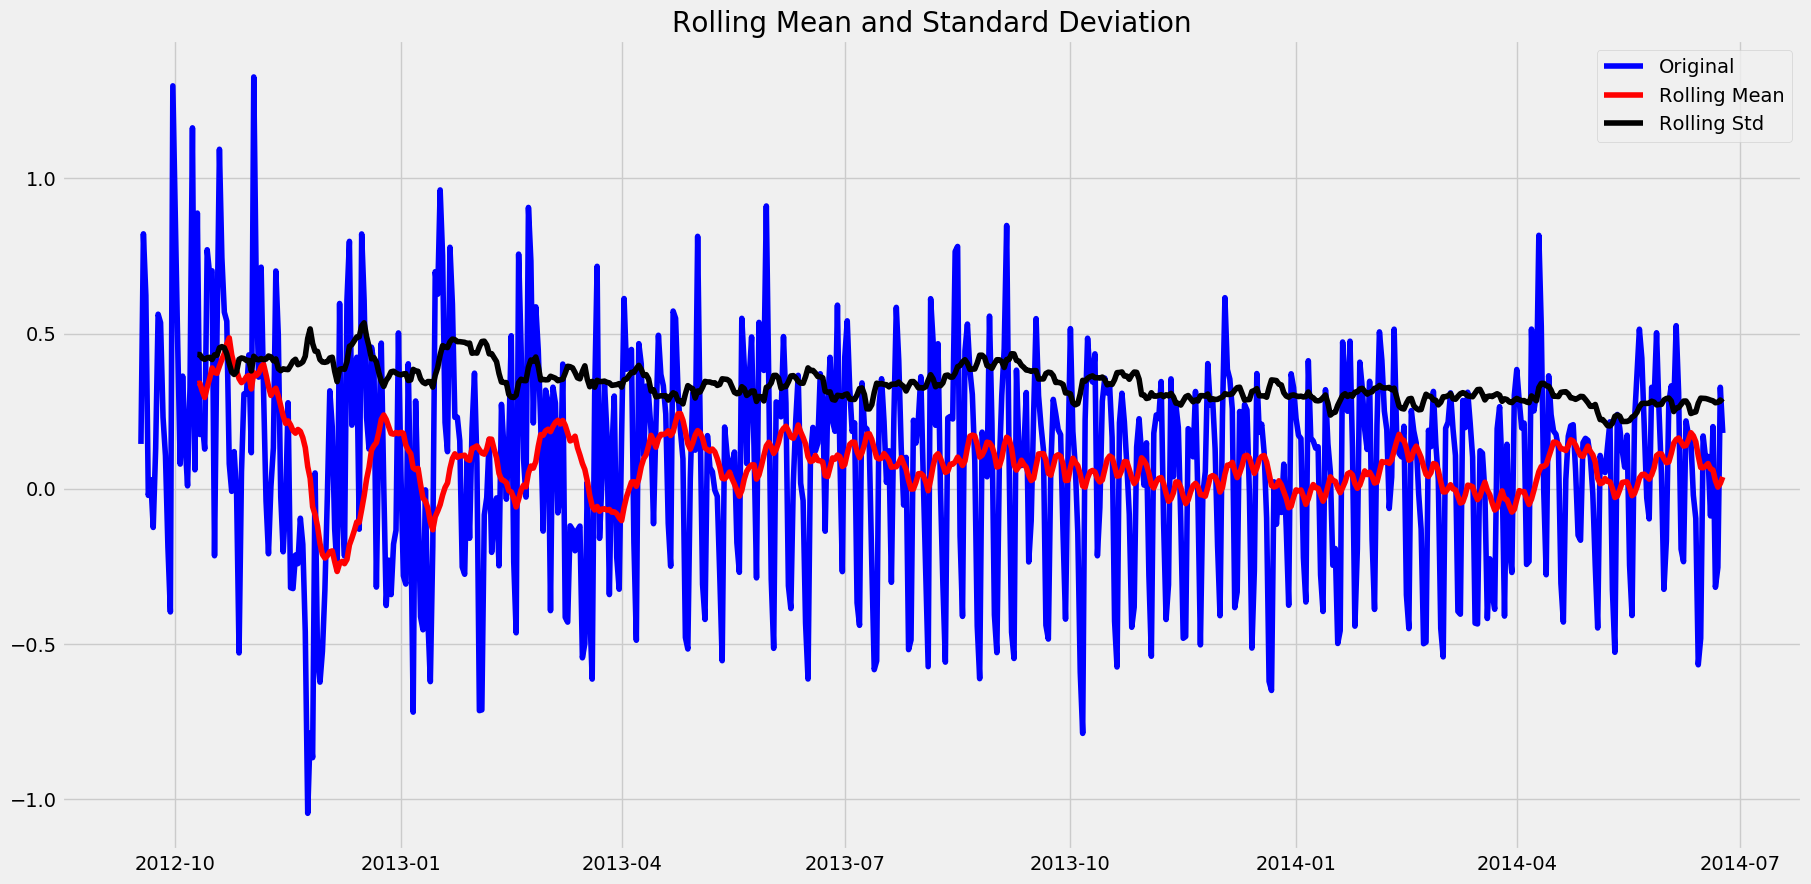

Results of Dickey Fuller test: 
Test Statistics               -5.861646e+00
p-value                        3.399422e-07
# Lag Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [71]:
train_log_moving_diff = Train_log - moving_avg
train_log_moving_diff.dropna(inplace = True)
test_stationary(train_log_moving_diff)

We can see that the Test Statistic is very smaller as compared to the Critical Value. So, we can be
confident that the trend is almost removed

**Differncing can help to make series stable and eliminate trend**

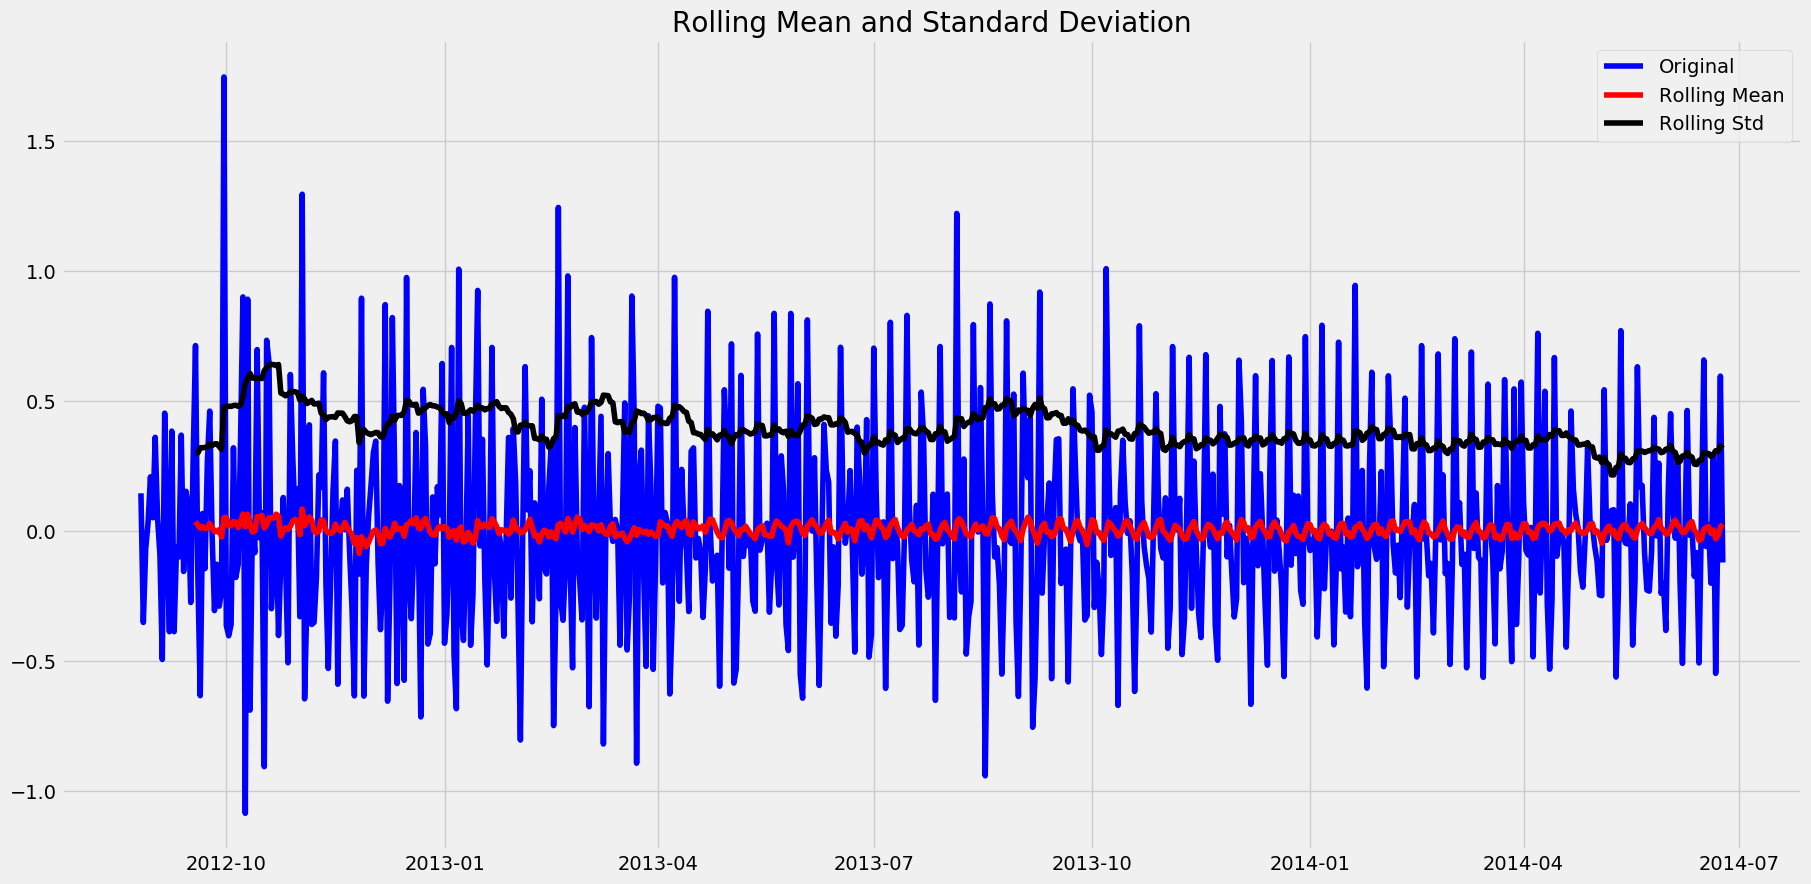

Results of Dickey Fuller test: 
Test Statistics               -8.237568e+00
p-value                        5.834049e-13
# Lag Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [72]:
train_log_diff = Train_log - Train_log.shift(1)
test_stationary(train_log_diff.dropna())

### Removing Seasonailty

By seasonality, we mean periodic fluctuations. A seasonal pattern exists when a series is
influenced by seasonal factors (e.g., the quarter of the year, the month, or day of the week).
Seasonality is always of a fixed and known period.
We will use seasonal decompose to decompose the time series into trend, seasonality and
residuals.

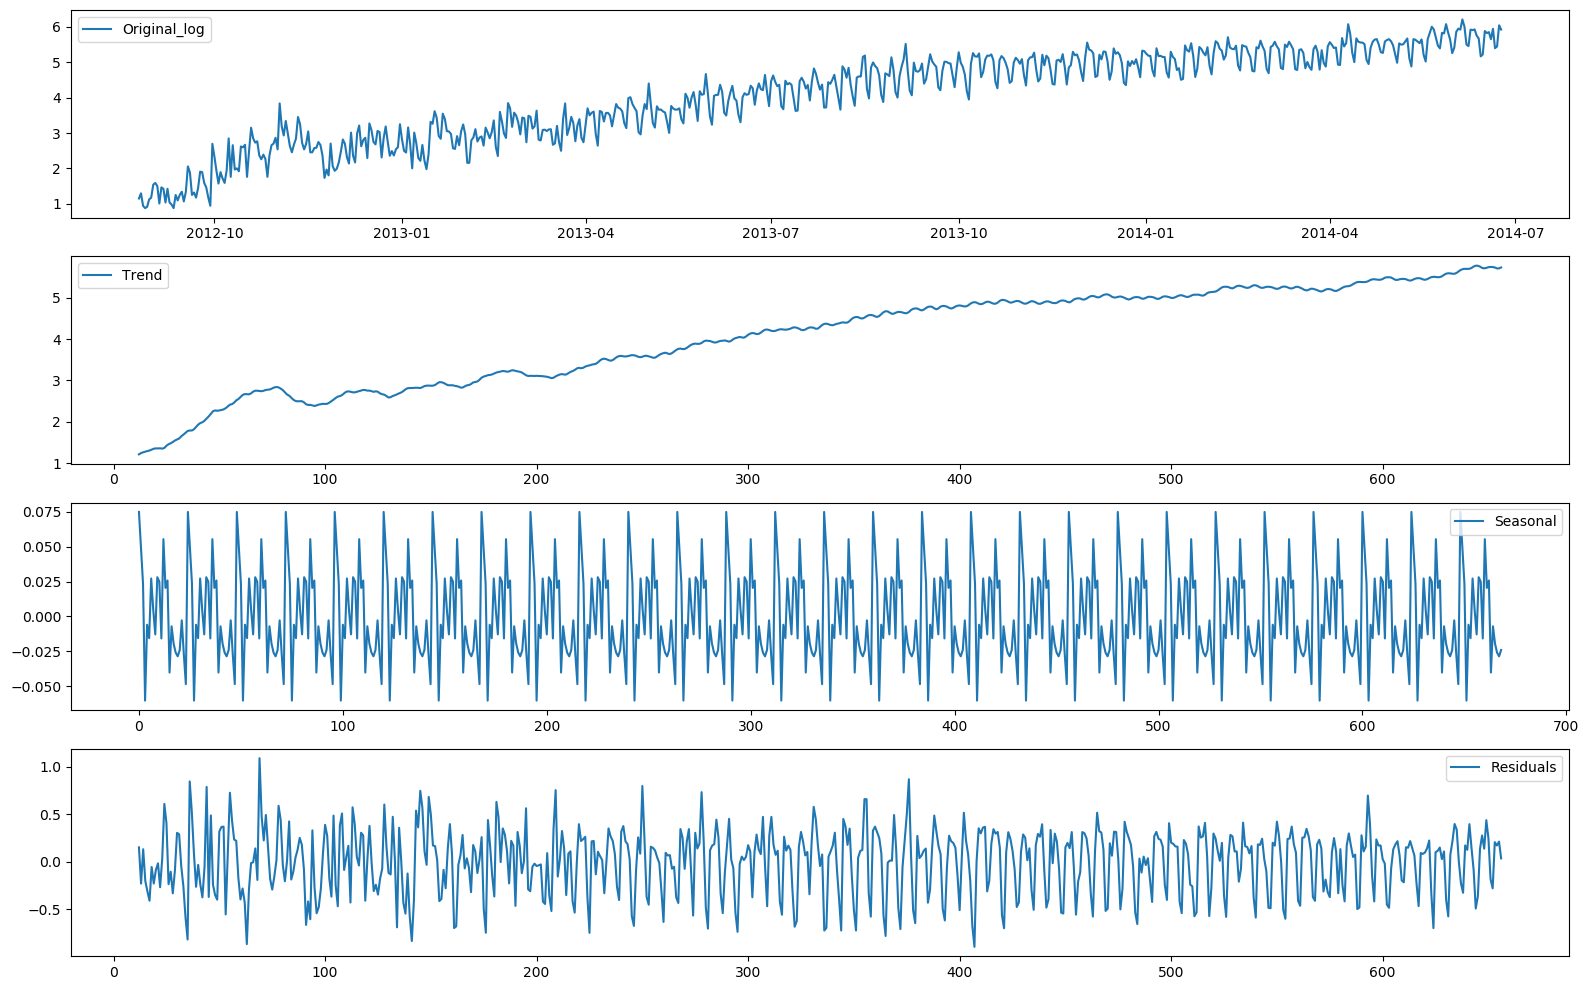

In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize = (16,10))
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq = 24)
plt.style.use('default')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Train_log, label = 'Original_log')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()




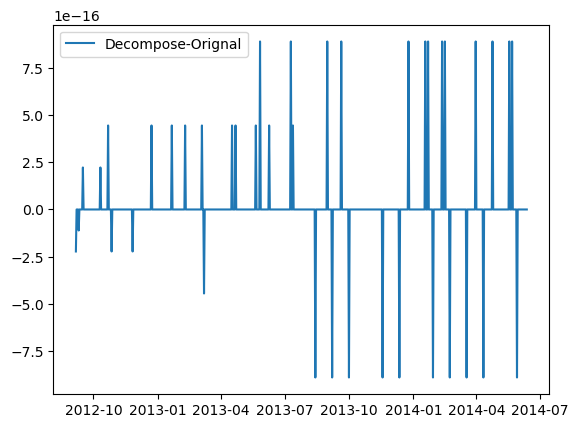

In [86]:
plt.plot(residual+trend+seasonal-Train_log, label = 'Decompose-Orignal')
#plt.plot(Train_log, label = 'Original')
plt.legend(loc = 'best')



*** Let's check stationarity of residuals***

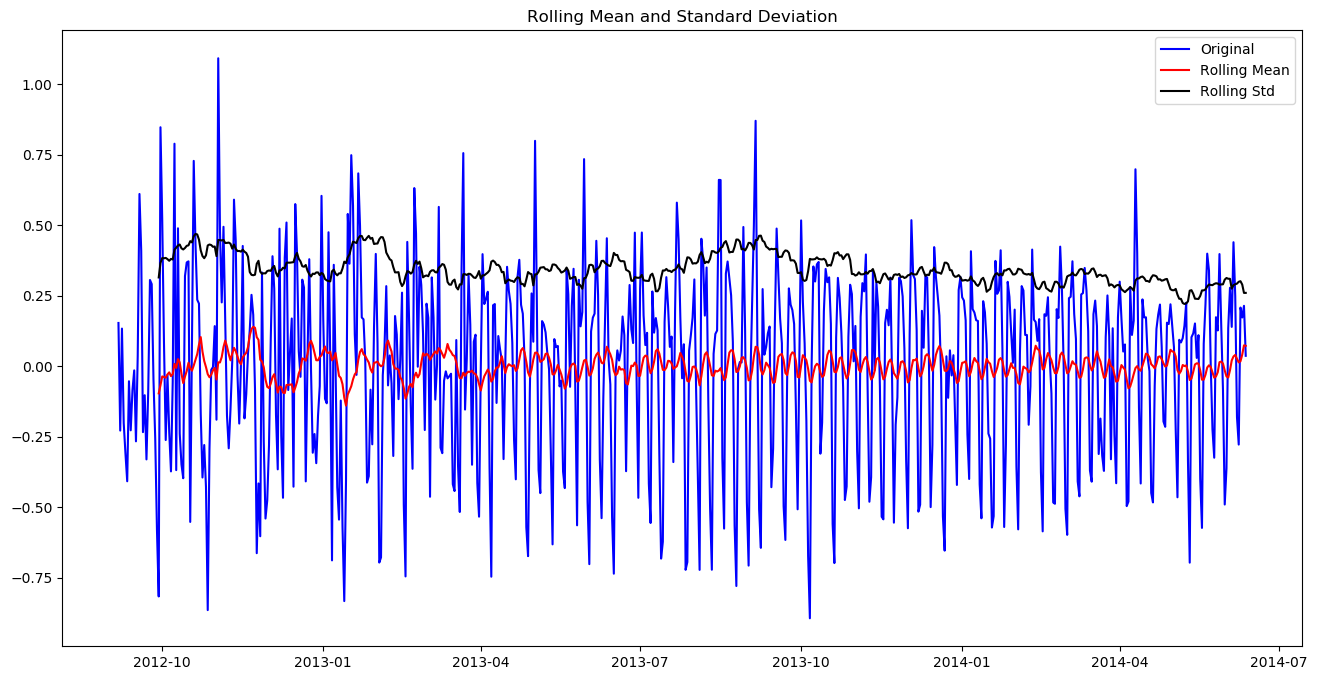

Results of Dickey Fuller test: 
Test Statistics               -7.822096e+00
p-value                        6.628321e-12
# Lag Used                     2.000000e+01
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


In [75]:
plt.figure(figsize = (16,8))
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace = True)
test_stationary(train_log_decompose[0])

It can be interpreted from the results that the residuals are stationary.
Now we will forecast the time series using different models.
## Forecasting the time series using ARIMA
First of all we will fit the ARIMA model on our time series for that we have to find the
optimized values for the p,d,q parameters.
To find the optimized values of these parameters, we will use ACF(Autocorrelation
Function) and PACF(Partial Autocorrelation Function) graph.
ACF is a measure of the correlation between the TimeSeries with a lagged version of itself.
PACF measures the correlation between the TimeSeries with a lagged version of itself but
after eliminating the variations already explained by the intervening comparisons.

In [87]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(train_log_diff.dropna(), nlags = 25)
lag_pacf = pacf(train_log_diff.dropna(), nlags = 25, method= "ols")

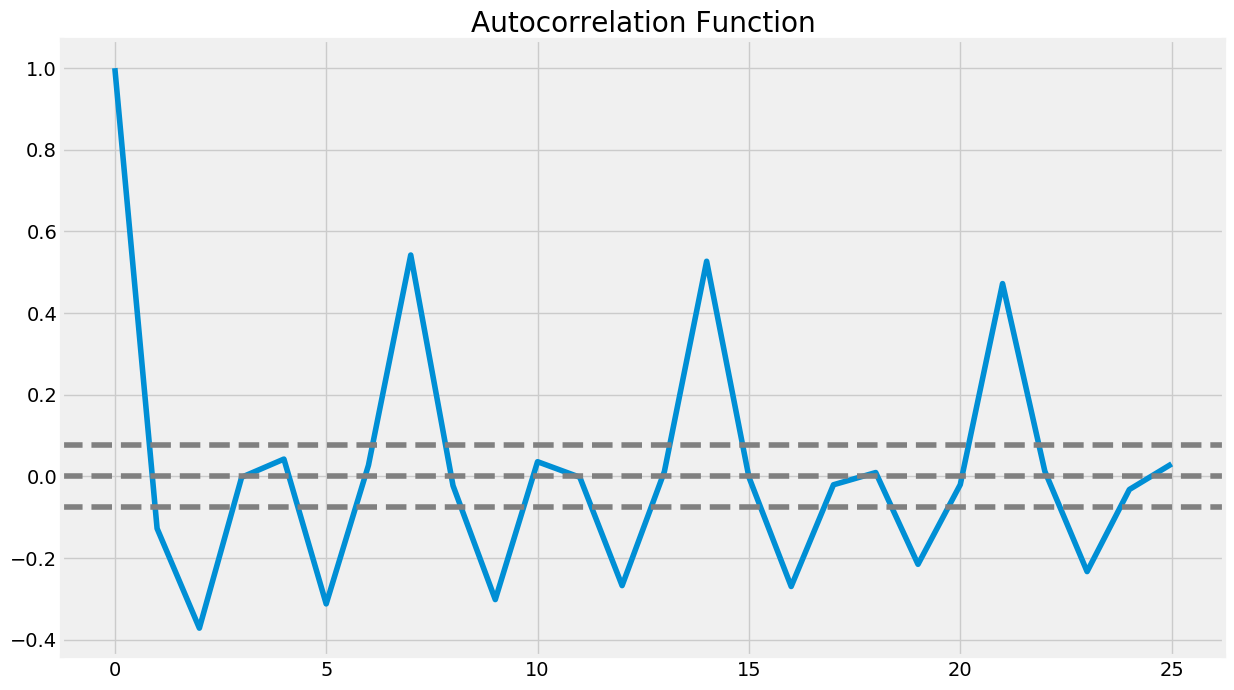

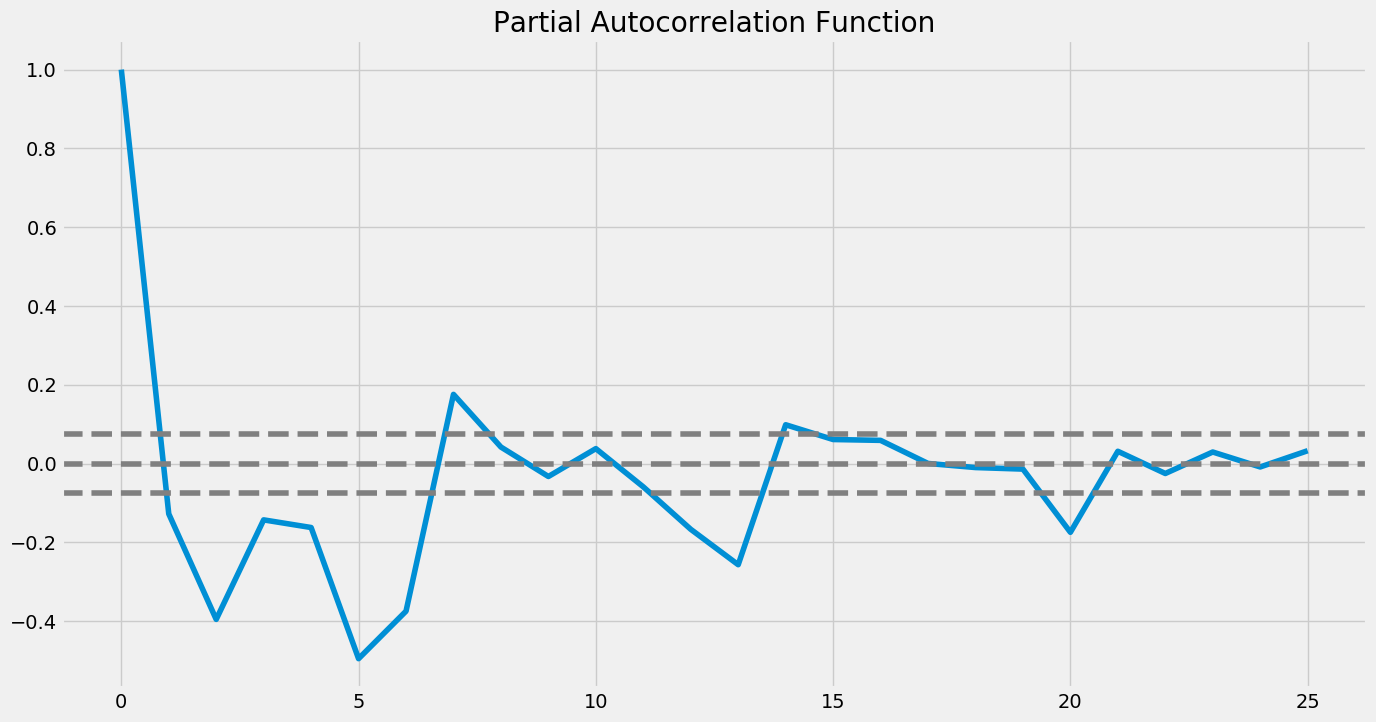

In [88]:
plt.figure(figsize = (15,8))
plt.style.use("fivethirtyeight")
plt.plot(lag_acf)
plt.axhline( y = 0, linestyle = "--", color = "gray")
plt.axhline( y= -1.96/np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.axhline(y = 1.96 /np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.title("Autocorrelation Function")
plt.show()

# PACF
plt.figure(figsize = (15,8))
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = "--", color = "gray")
plt.axhline(y = -1.96/np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.axhline( y = 1.96/np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.title("Partial Autocorrelation Function")
plt.show()

p value is the lag value where the PACF chart crosses the upper confidence interval for the
first time. It can be noticed that in this case p=2.
q value is the lag value where the ACF chart crosses the upper confidence interval for the
first time. It can be noticed that in this case q=2.
Now we will make the ARIMA model as we have the p,q values. We will make the AR and
MA model separately and then combine them together.
## AR model
The autoregressive model specifies that the output variable depends linearly on its own previous
values.


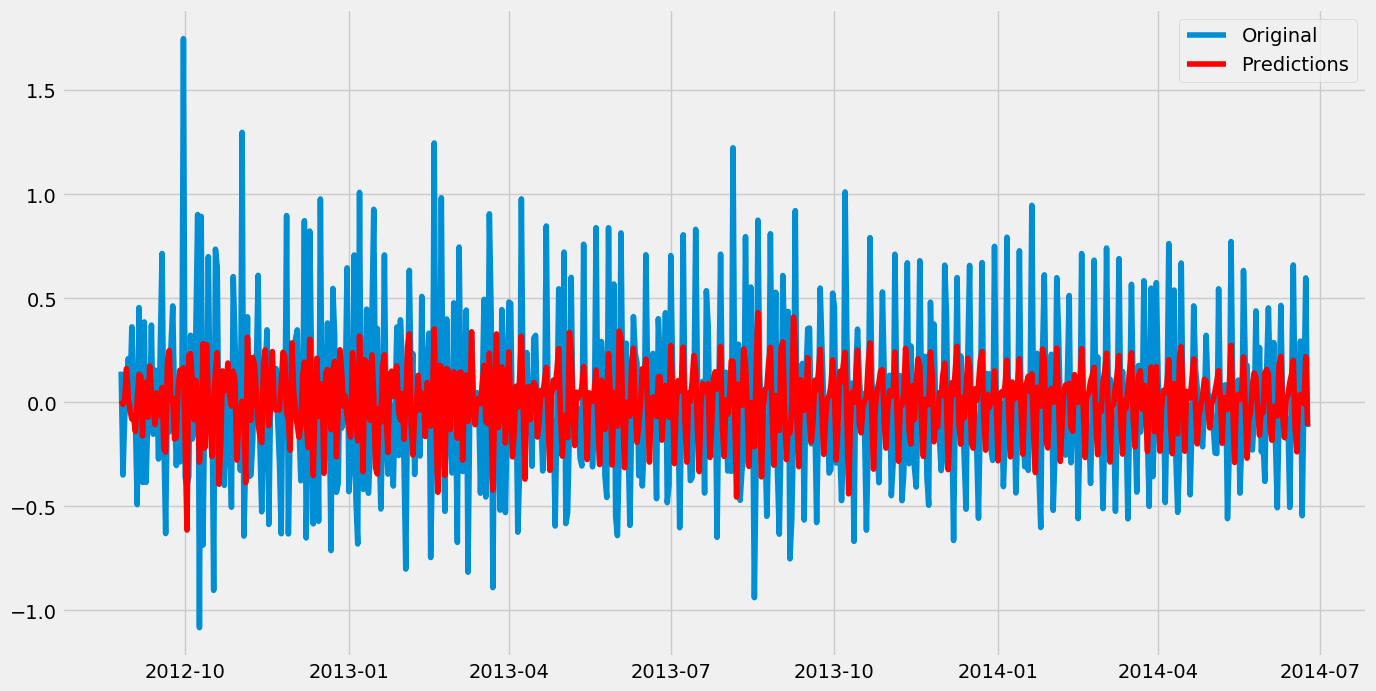

In [89]:
from statsmodels.tsa.arima_model import ARIMA
plt.figure(figsize = (15,8))
model = ARIMA(Train_log, order = (2,1,0))  #here q value is zero since it is just AR Model
results_AR = model.fit(disp=-1)
plt.plot(train_log_diff.dropna(), label = "Original")
plt.plot(results_AR.fittedvalues, color = 'red', label = 'Predictions')
plt.legend(loc = 'best')


Lets plot the validation curve for AR model.
We have to change the scale of the model to the original scale.
First step would be to store the predicted results as a separate series and observe it.

In [90]:
AR_predict = results_AR.predict(start="2014-06-25", end="2014-09-25")
AR_predict = AR_predict.cumsum().shift().fillna(0)
AR_predict1 = pd.Series(np.ones(valid.shape[0])* np.log(valid['Count'])[0], index = valid.index)
AR_predict1=AR_predict1.add(AR_predict,fill_value=0)
AR_predict = np.exp(AR_predict1)

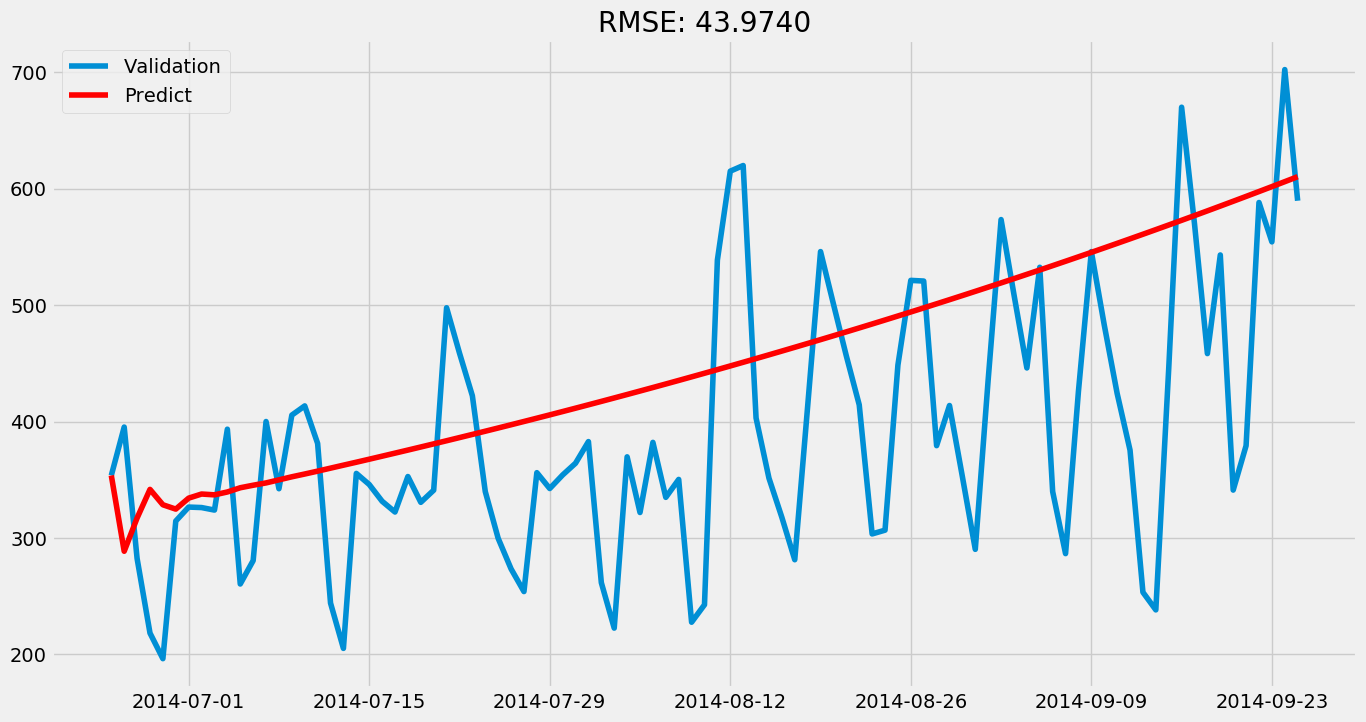

In [189]:
plt.figure(figsize = (15,8))
plt.plot(valid['Count'], label = "Validation")
plt.plot(AR_predict, color = "red", label = "Predict")
plt.legend(loc = "best")
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid['Count']))/valid.shape[0]))
plt.show()

Here the red line shows the prediction for the validation set. Let’s build the MA model now.
## MA model
The moving-average model specifies that the output variable depends linearly on the current
and various past values of a stochastic (imperfectly predictable) term.

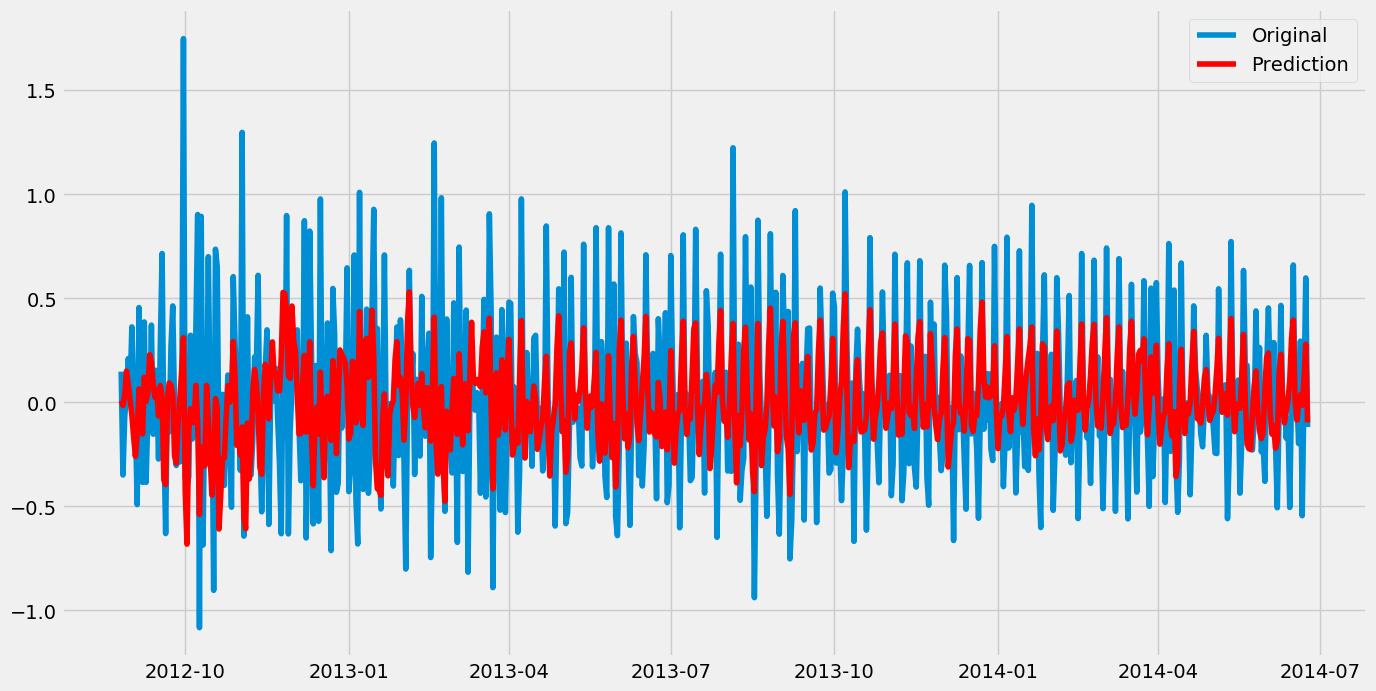

In [91]:
plt.figure(figsize = (15,8))
model = ARIMA(Train_log, order = (0,1,2)) # here the p value is 0 since it is moving average model
results_MA = model.fit(disp = -1)
plt.plot(train_log_diff.dropna(), label = "Original")
plt.plot(results_MA.fittedvalues, color = "red", label = "Prediction")
plt.legend(loc = "best")

In [92]:
MA_predict = results_MA.predict(start="2014-06-25", end="2014-09-25")
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index)
MA_predict1=MA_predict1.add(MA_predict,fill_value=0)
MA_predict = np.exp(MA_predict1)

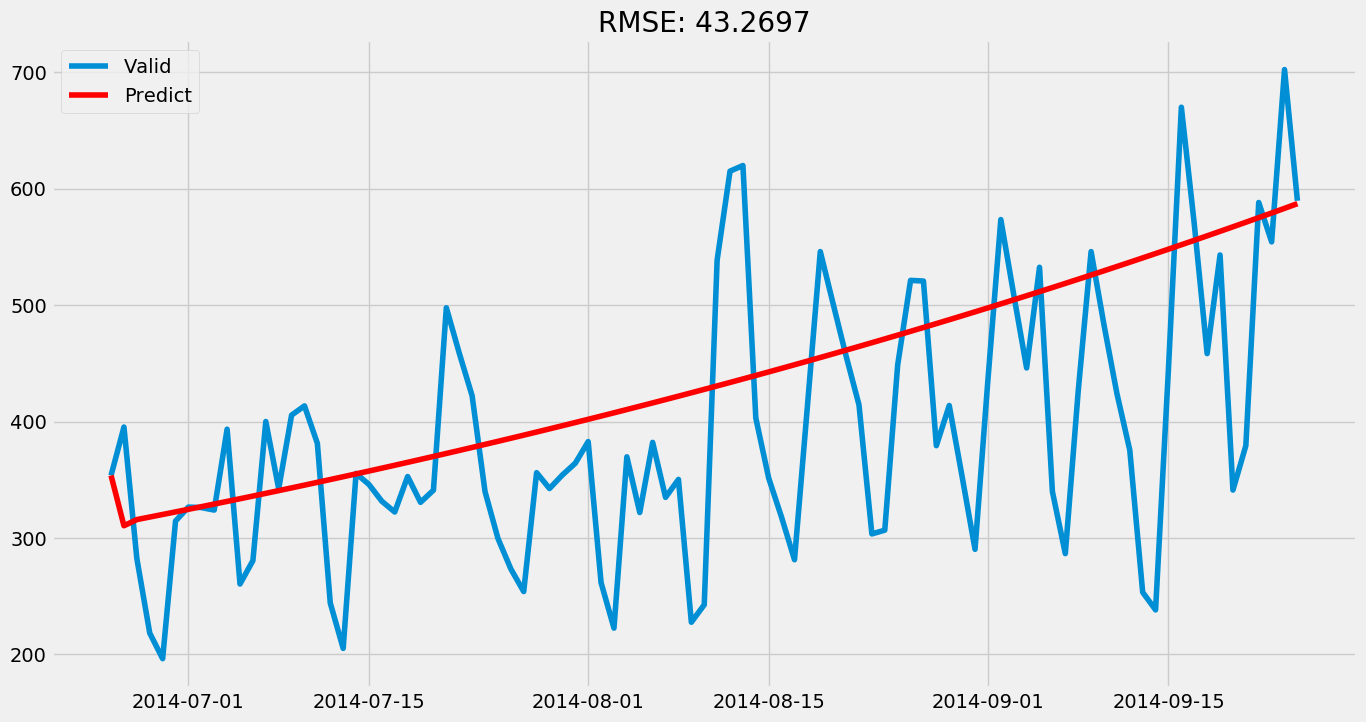

In [93]:
plt.figure(figsize = (15,8))
plt.plot(valid['Count'], label = "Valid")
plt.plot(MA_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['Count']))/valid.shape[0]))
plt.show()

**Combined Model**

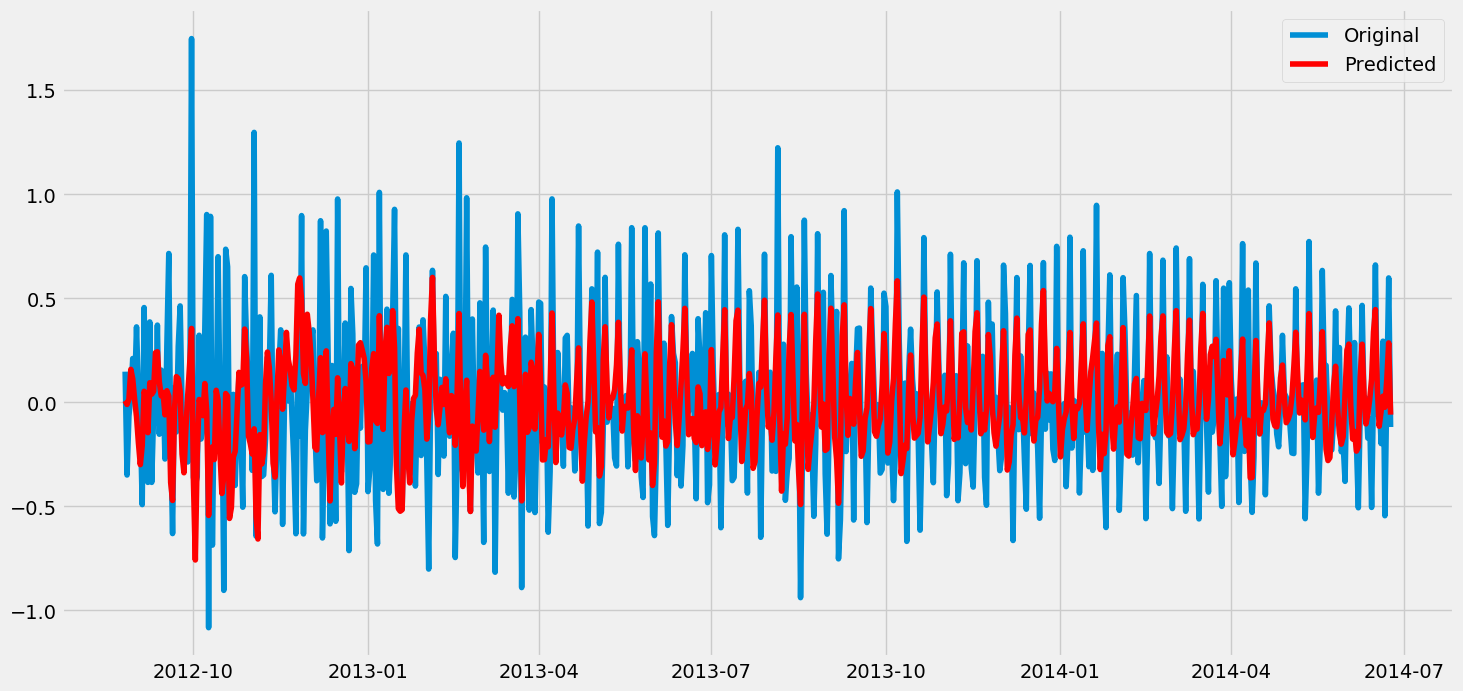

In [94]:
plt.figure(figsize = (16,8))
model = ARIMA(Train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),  label='Original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='Predicted')
plt.legend(loc='best')
plt.show()

**Function to scale model to original scale**
Let’s define a function which can be used to change the scale of the model to the original scale.


In [95]:

def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

In [96]:
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

Let's predict

In [97]:
ARIMA_predict_diff=results_ARIMA.predict(start="2014-06-25", end="2014-09-25")

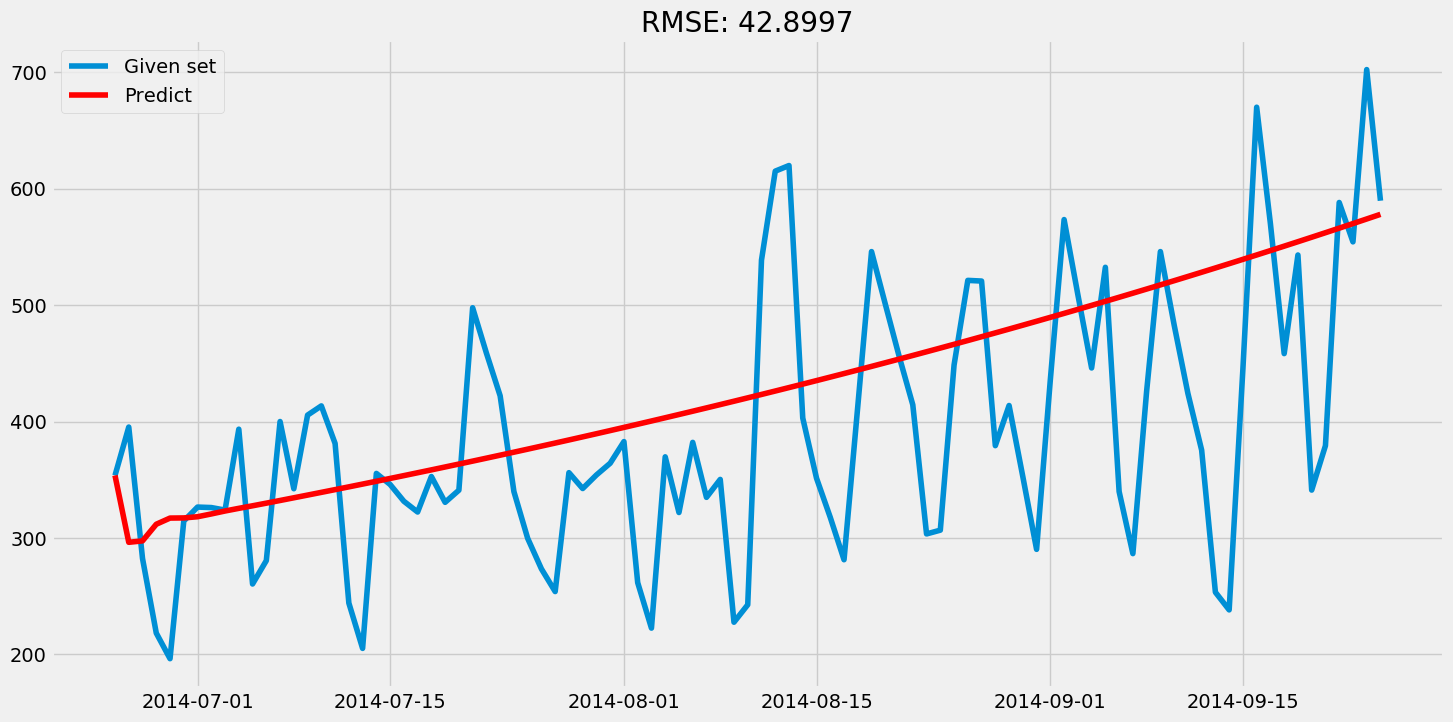

In [98]:
plt.figure(figsize = (16,8))
check_prediction_diff(ARIMA_predict_diff, valid)

### SARIMAX model on daily time series
SARIMAX model takes into account the seasonality of the time series. So we will build a
SARIMAX model on the time series.

In [198]:
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Text(0.5, 1.0, 'SARIMAX Model')

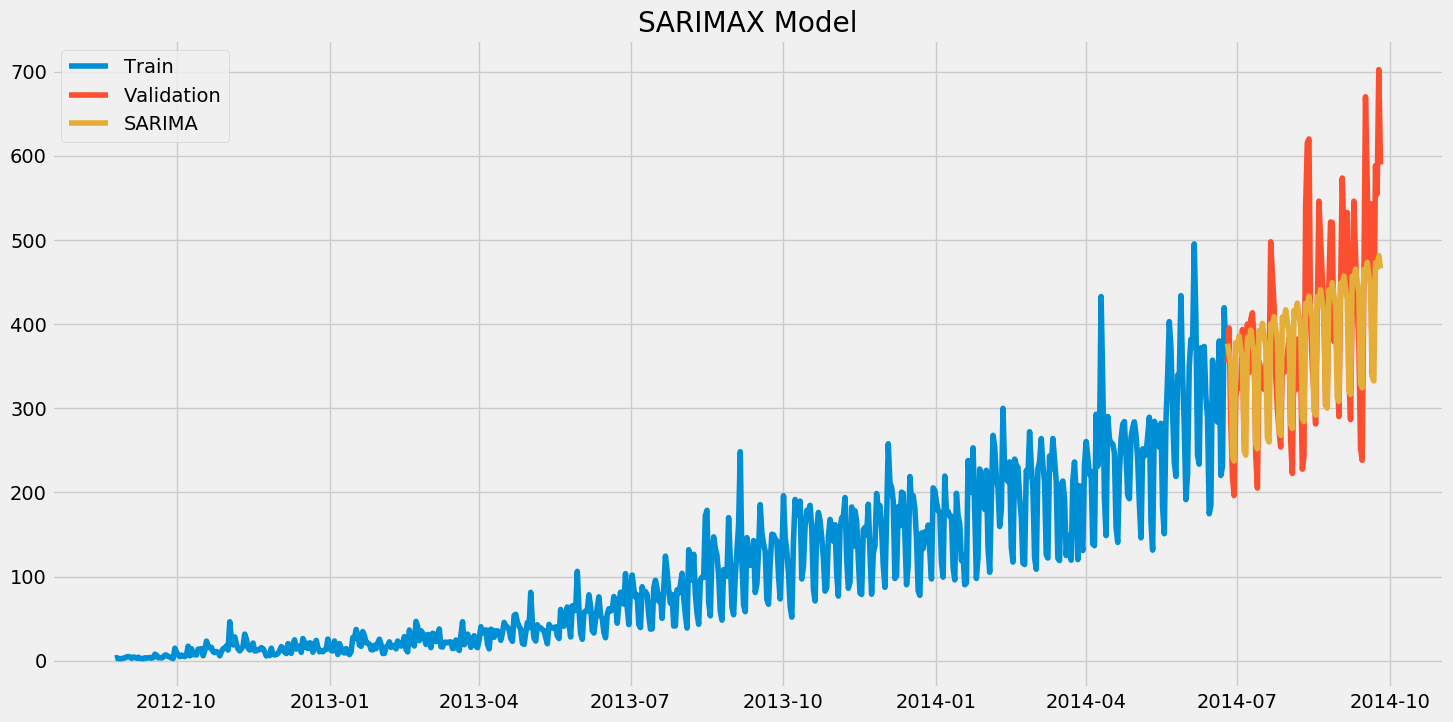

In [99]:
y_hat_avg = valid.copy()
fit1 = sm.tsa.statespace.SARIMAX(Train.Count, order = (2,1,4), seasonal_order =(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2014-6-25", end="2014-9-25", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label = "Train")
plt.plot(valid.Count, label = "Validation")
plt.plot(y_hat_avg['SARIMA'], label ="SARIMA")
plt.legend(loc = "best")
plt.title("SARIMAX Model")

Order in the above model represents the order of the autoregressive model(number of
time lags), the degree of differencing(number of times the data have had past values
subtracted) and the order of moving average model.
Seasonal order represents the order of the seasonal component of the model for the AR
parameters, differences, MA parameters, and periodicity.
In our case the periodicity is 7 since it is daily time series and will repeat after every 7 days.

Let’s check the rmse value for the validation part.

In [200]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SARIMA))
print(rms)

70.05331614352023


**Covert to Hourly Predictions**

Now we will forecast the time series for Test data which starts from 2014-9-26 and ends at
2015-4-26.

In [201]:
predict = fit1.predict(start="2014-9-26", end="2015-4-26", dynamic=True)

Note that these are the daily predictions and we need hourly predictions. So, we will distribute
this daily prediction into hourly counts. To do so, we will take the ratio of hourly distribution of
passenger count from train data and then we will distribute the predictions in the same ratio.

In [100]:
test['prediction']=predict

In [101]:
#Merge test and test_original on day,month and year
merge = pd.merge(test,test_original, on = ('day', 'month', 'year'), how = 'left')
merge['Hour'] = merge['Hour_y']

#Predicting by merging merge and temp2
prediction = pd.merge(merge, temp2, on = 'Hour', how = 'left')

#Converting the ratio to original scale
prediction['Count'] = prediction['prediction'] * prediction['ratio'] * 24

In [102]:
prediction['ID']=prediction['ID_y']
submission=prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('SARIMAX.csv')

In [103]:
prediction

ID_x    year  month   day  Hour_x  prediction   ID_y  \
0     18299.5  2014.0    9.0  26.0    11.5  387.303062  18288   
1     18299.5  2014.0    9.0  26.0    11.5  387.303062  18289   
2     18299.5  2014.0    9.0  26.0    11.5  387.303062  18290   
3     18299.5  2014.0    9.0  26.0    11.5  387.303062  18291   
4     18299.5  2014.0    9.0  26.0    11.5  387.303062  18292   
...       ...     ...    ...   ...     ...         ...    ...   
5107  23387.5  2015.0    4.0  26.0    11.5  460.608836  23395   
5108  23387.5  2015.0    4.0  26.0    11.5  460.608836  23396   
5109  23387.5  2015.0    4.0  26.0    11.5  460.608836  23397   
5110  23387.5  2015.0    4.0  26.0    11.5  460.608836  23398   
5111  23387.5  2015.0    4.0  26.0    11.5  460.608836  23399   

                Datetime  Hour_y  Hour     ratio       Count     ID  
0    2014-09-26 00:00:00       0     0  0.044287  411.655947  18288  
1    2014-09-26 01:00:00       1     1  0.035343  328.522982  18289  
2    2014-09-26 02:00:00       2     2  0.029911  278.031630  18290  
3    2014-09-26 03:00:00       3     3  0.024714  229.727603  18291  
4    2014-09-26 04:00:00       4     4  0.020802  193.362418  18292  
...                  ...     ...   ...       ...         ...    ...  
5107 2015-04-26 19:00:00      19    19  0.055627  614.930538  23395  
5108 2015-04-26 20:00:00      20    20  0.053455  590.927010  23396  
5109 2015-04-26 21:00:00      21    21  0.049895  551.567837  23397  
5110 2015-04-26 22:00:00      22    22  0.050076  553.568856  23398  
5111 2015-04-26 23:00:00      23    23  0.048892  540.483931  23399  

[5112 rows x 13 columns]